In [6]:
%load_ext autoreload
%autoreload 2

# Get parent root directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from src.rocket import Rocket
from src.pos_rocket_vis import *
from nmpc_land import NmpcCtrl
import numpy as np

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

In [ ]:
sim_time = 4 # simulation length in seconds
x0 = np.array([0, 0, 0, 0, 0, np.deg2rad(30), 0, 0, 0, 3, 2, 10]) # w, phi, v, p
x_ref = np.array([0.]*9 + [1., 0., 3.])
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)

H = 2 # horizon time 
nmpc = NmpcCtrl(rocket, H, xs, us)

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]


In [9]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(nmpc, sim_time, H, x0)

Simulating time 0.00
[parameter injection]
  X0.shape = (12, 1)
  X0(z,beta) = (10.000, 0.00deg)

[NMPC get_u]
  t0 = 0.00
[initial state]
  z      =  10.0000
  beta   =  0.00 deg
  vz     =  0.0000
  Pavg(trim) =  56.6667
[warm start] using trim / hold
  U_init = [ 0.          0.         56.66666667  0.        ]
[parameter injection]
  X0.shape = (12, 1)
  X0(z,beta) = (9.996, -0.28deg)

[NMPC get_u]
  t0 = 0.05
[initial state]
  z      =  9.9959
  beta   = -0.28 deg
  vz     = -0.1643
  Pavg(trim) =  56.6667
[warm start] shifted previous solution
  U_prev[0] = [-0.26        0.26000001 40.26034529 -1.17924542]
[parameter injection]
  X0.shape = (12, 1)
  X0(z,beta) = (9.984, -1.12deg)

[NMPC get_u]
  t0 = 0.10
[initial state]
  z      =  9.9839
  beta   = -1.12 deg
  vz     = -0.3149
  Pavg(trim) =  56.6667
[warm start] shifted previous solution
  U_prev[0] = [-0.26        0.26       41.42210223 -1.00301924]
[parameter injection]
  X0.shape = (12, 1)
  X0(z,beta) = (9.965, -2.54deg)



AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=159, step=2), IntSlider(value=0…

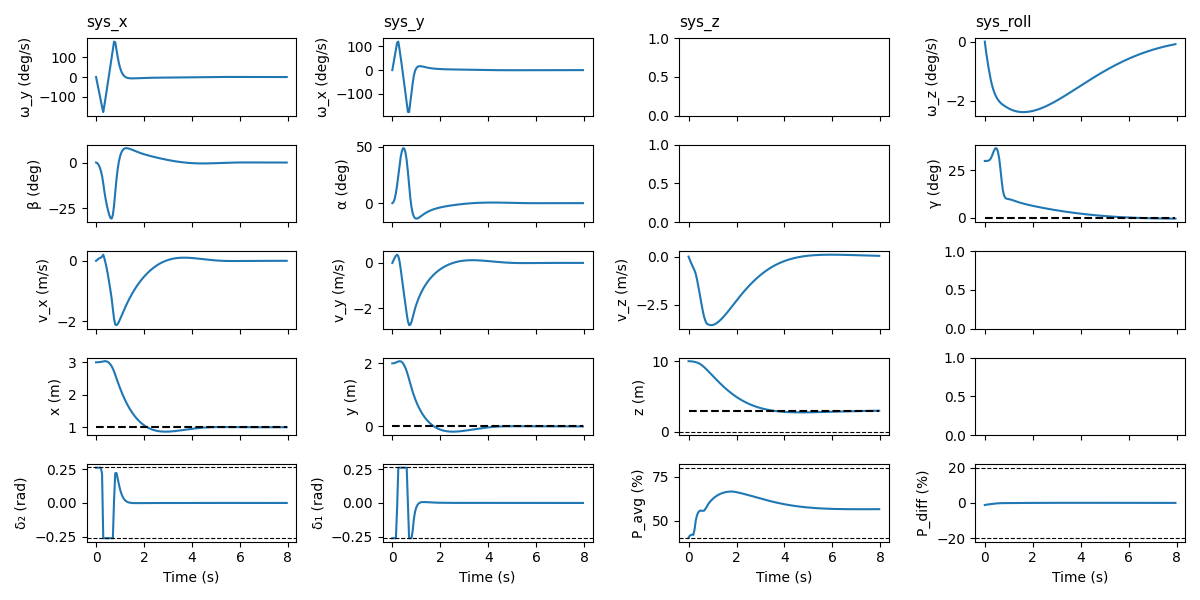

In [10]:
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)